### Actividad 0.2 
Graficar series temporales: una puesta en comúnObjetivo: graficar la serie temporal asignada a su grupo.En la carpeta compartidade la materia, bajo "clase 00/ligo-data" encontrarán archivos con seriestemporales y un "readme.txt" con la asignación de cada serie por grupo.Deben bajar la serie correspondiente, descomprimirla, importarla al programa que deseen usar ygraficarla.

:
•Las mediciones corresponden a señales de interferómetros gravitacionales en ciertoseventos especiales fueron bajadas dehttps://www.ligo.caltech.edu/page/ligo-dataSdf

•Hay datos de distintos grupos que corresponden a un mismo evento. ¿Ven algunacorrelación?Forma de entrega: Una diapositiva con el/los gráficos producidos, que van acomentar en la clase como si fueran un “figure caption” o epígrafe parlante.


Nos toca: grupo 05 -> H-H1_GWOSC_4KHZ_R1-1239082247-32.txt.gz

In [2]:
import numpy as np
import gzip
import requests, os
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

In [3]:
#abro el archivo
fn = 'ligo-data/H-H1_GWOSC_4KHZ_R1-1239082247-32.txt.gz'
with gzip.open(fn, "rb") as file:
    contents = file.read().decode("utf-8") 

In [4]:
#acomodo 
data = contents.split('\n')
ayuda = data[0:2]
print("Info sobre la base temporal: ",ayuda)
data = list(map(float, data[3:-1]))

Info sobre la base temporal:  ['# Gravitational wave strain for O3_Discovery_Papers_GW190412_R1 for H1 (see http://losc.ligo.org)', '# This file has 4096 samples per second']


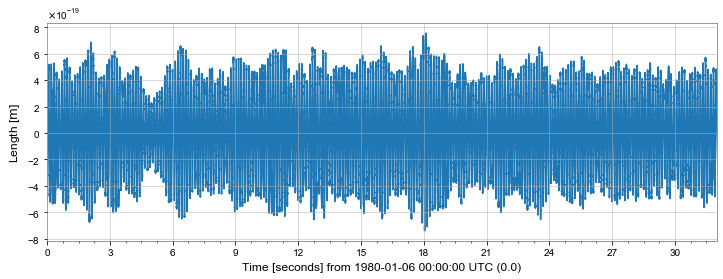

In [5]:
# Ploteo los datos "crudos"
strain = TimeSeries(data,sample_rate=4096 ,unit='m')
fig1 = strain.plot(xlim=([0,32]))
plt.show()

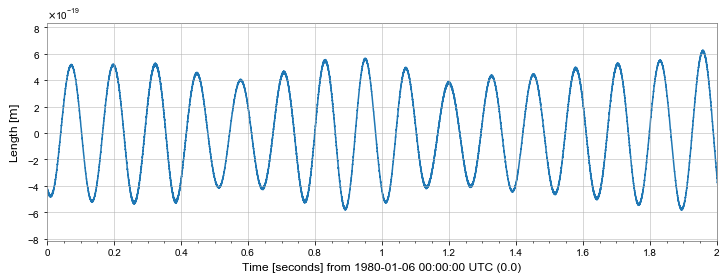

In [6]:
# Muestro solo los primeros dos segundos
strain = TimeSeries(data,sample_rate=4096 ,unit='m')
fig1 = strain.plot(xlim=([0,2]))
plt.show()

###  Limpieza de Sonido
Vamos a usar el método FFT-averaging method (Fast Fourier Transform) para limpiar el ruido de las series temporales que cargamos. Es la forma default$^{[1]}$ que utiliza el método .asd() del objeto TimeSeries para limpiar señales. 
En el siguiente texto se explica su funcionamiento.



####  FFT-averaging method Explicado$^{[2]}$
La señal de los detectores mide una serie temporal $d(t)$. Esta función puede contener únicamente ruido - $ d(t) = n(t) $- o también puede contener señal - $d(t) = n(t) + h(t)$ .
Hay varias fuentes de ruido en los detectores, afectando distintas frecuencias. Si se asume que el ruido es estacionario, es decir, que sus propiedades no cambian a lo largo del tiempo, entonces se puede describirlo según la Densidad Espectral de Potencia $ S_n(f)$.

La descripción estadística del sonido en términos de la Densidad Espectral de Potencia nos ayuda a entender los datos. Sin emabrgo, esa descripción viene dada como función de la frecuencia. Para poder trabajar con ella necesitamos transformar el dominio temporal a frecuencia utilizanod la transformada de Fourier.
$ d(f) = \mathcal{F}_f\left\{d(t)\right\} = \int_{-\infty}^{\infty} d(t) \exp(-2\pi i f t) \,\mathrm{d}t $

Como nuestro periodo de tiempo es finito, tomamos la convolución en el espacio de frecuencias de $d(f)$ con la función $ w(f)$, donde esta última es una función ventanta$^{[3]}$ que tiende a 0 fuera del intervalo de tiempo del periodo.
Tomamos esta convolución convenientemente sabiendo queÑ

$ d(f) \ast w(f) = \mathcal{F}_f\left\{d(t)w(t)\right\} $



##### Aclaraciones sobre las aproximaciones: 
En promedio se espera que el ruido de una determinada frecuencia sea 0, pero como fluctúa con una varianza dada por $ S_n(f)$, se puede aproximar el ruido Gaussiano como la distribución normal $ n(f) \sim \mathcal{N}(0; S_n(f)/2) $.
Tanto la aproximación Gaussiana como la estacionaria son buenas durante el tiempo en el que la señal es tomada.


Referencias
[1]  https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.asd
[2] https://arxiv.org/abs/1912.11716
[3] https://es.wikipedia.org/wiki/Ventana_(funci%C3%B3n)

(1e-24, 1e-19)

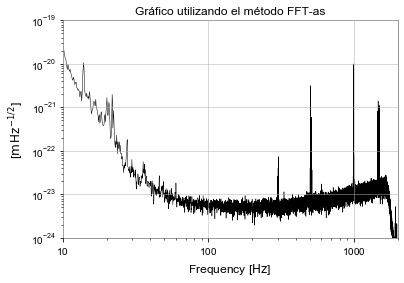

In [8]:
fig2 = strain.asd(fftlength=8).plot(color='black',linewidth=0.5,title="Gráfico utilizando el método FFT-as")
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

Probemos el metodo Barlett: Bartlett's method is the average of the periodograms taken of multiple segments of the signal to reduce variance of the spectral density estimate.

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Bartlett

(1e-24, 1e-19)

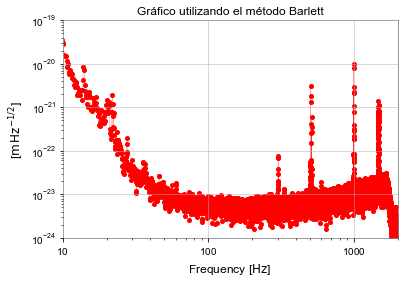

In [9]:
#malisimo el marker, pero era para jugar nomas
fig3 = strain.asd(fftlength=8, method = 'bartlett').plot(c='red',marker='o',markersize=4,linewidth=0.2,title="Gráfico utilizando el método Barlett")
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

In [ ]:
Acá como forma ilustrativa mostramos los datos blanqueados y luego  después de h data after a bandpass filter is applied to pick out the signal.

(0.0, 32.0)

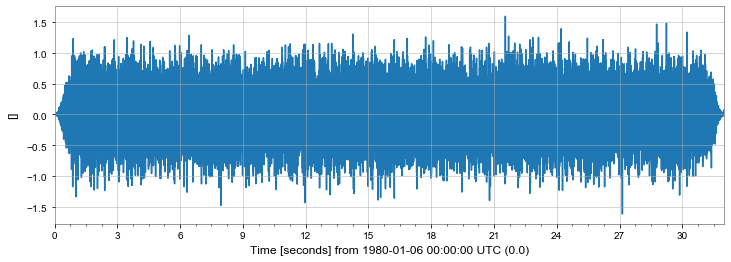

In [13]:
# Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig4 = bp_data.plot()
plt.xlim(0,32)